In [14]:
#IMPORTANT!!! SI NO ES TE DESCARREGAT LA RESTA DE REPOSITORI DE MUSICDIFF, AQUEST NOTEBOOK NO EXECUTARÀ IGUAL!!
import lib.NotationLinear as nlin
import lib.score_comparison_lib as scl
import lib.score_visualization as sv
import importlib
import os
import subprocess

import music21 as m21
from pathlib import Path

In [15]:
score1_path = Path("tests/test_scores/1.musicxml")
score1 = m21.converter.parse(str(score1_path))
score2_path = Path("tests/test_scores/2.musicxml")
score2 = m21.converter.parse(str(score2_path))
# build ScoreTrees
score_lin1 = nlin.Score(score1)
score_lin2 = nlin.Score(score2)

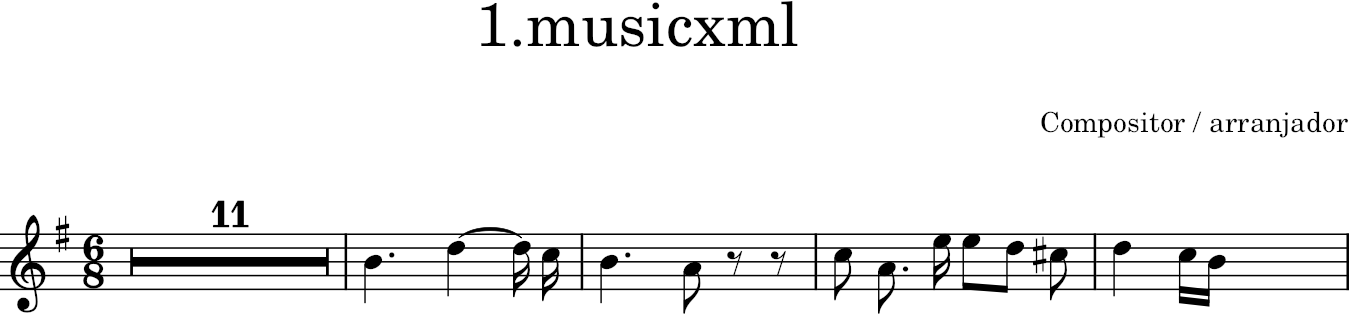

In [16]:
score1.show()

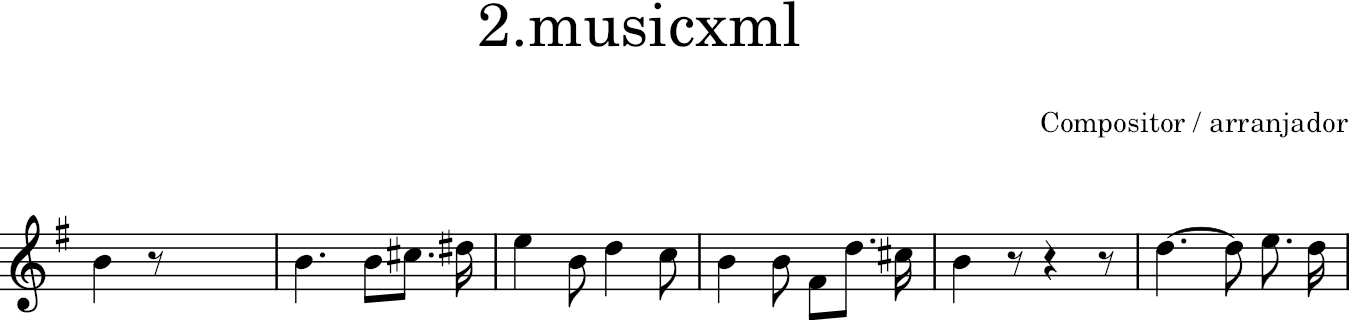

In [17]:
score2.show()

In [18]:
op_list, cost=scl.complete_scorelin_diff(score_lin1,score_lin2)

In [19]:
sv.annotate_differences(score1,score2, op_list)

Annotation type pitchtypeedit not yet supported for visualization
Annotation type pitchtypeedit not yet supported for visualization


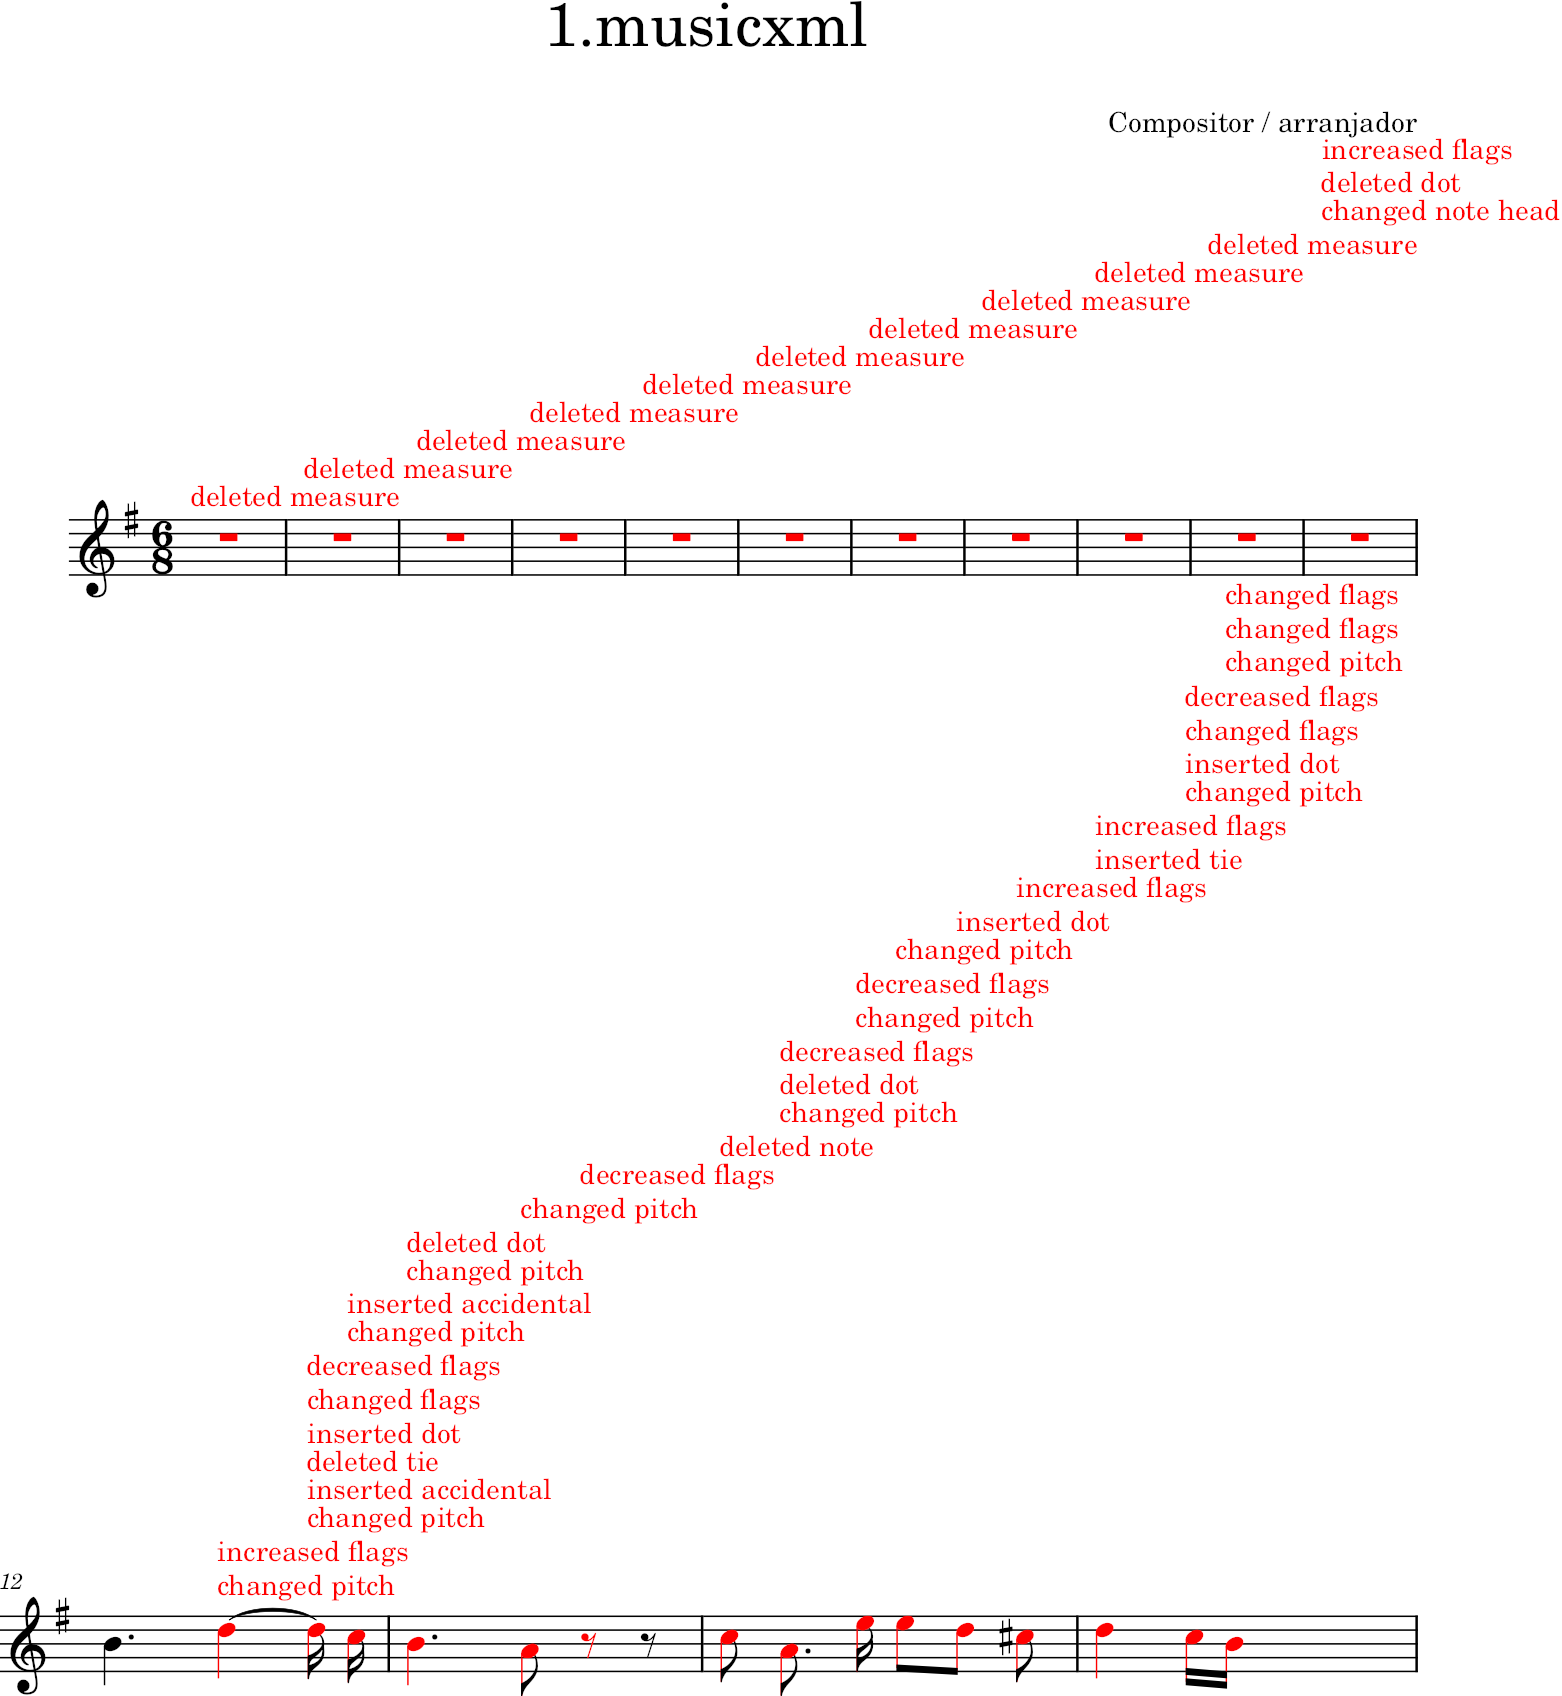

In [20]:
score1.show()

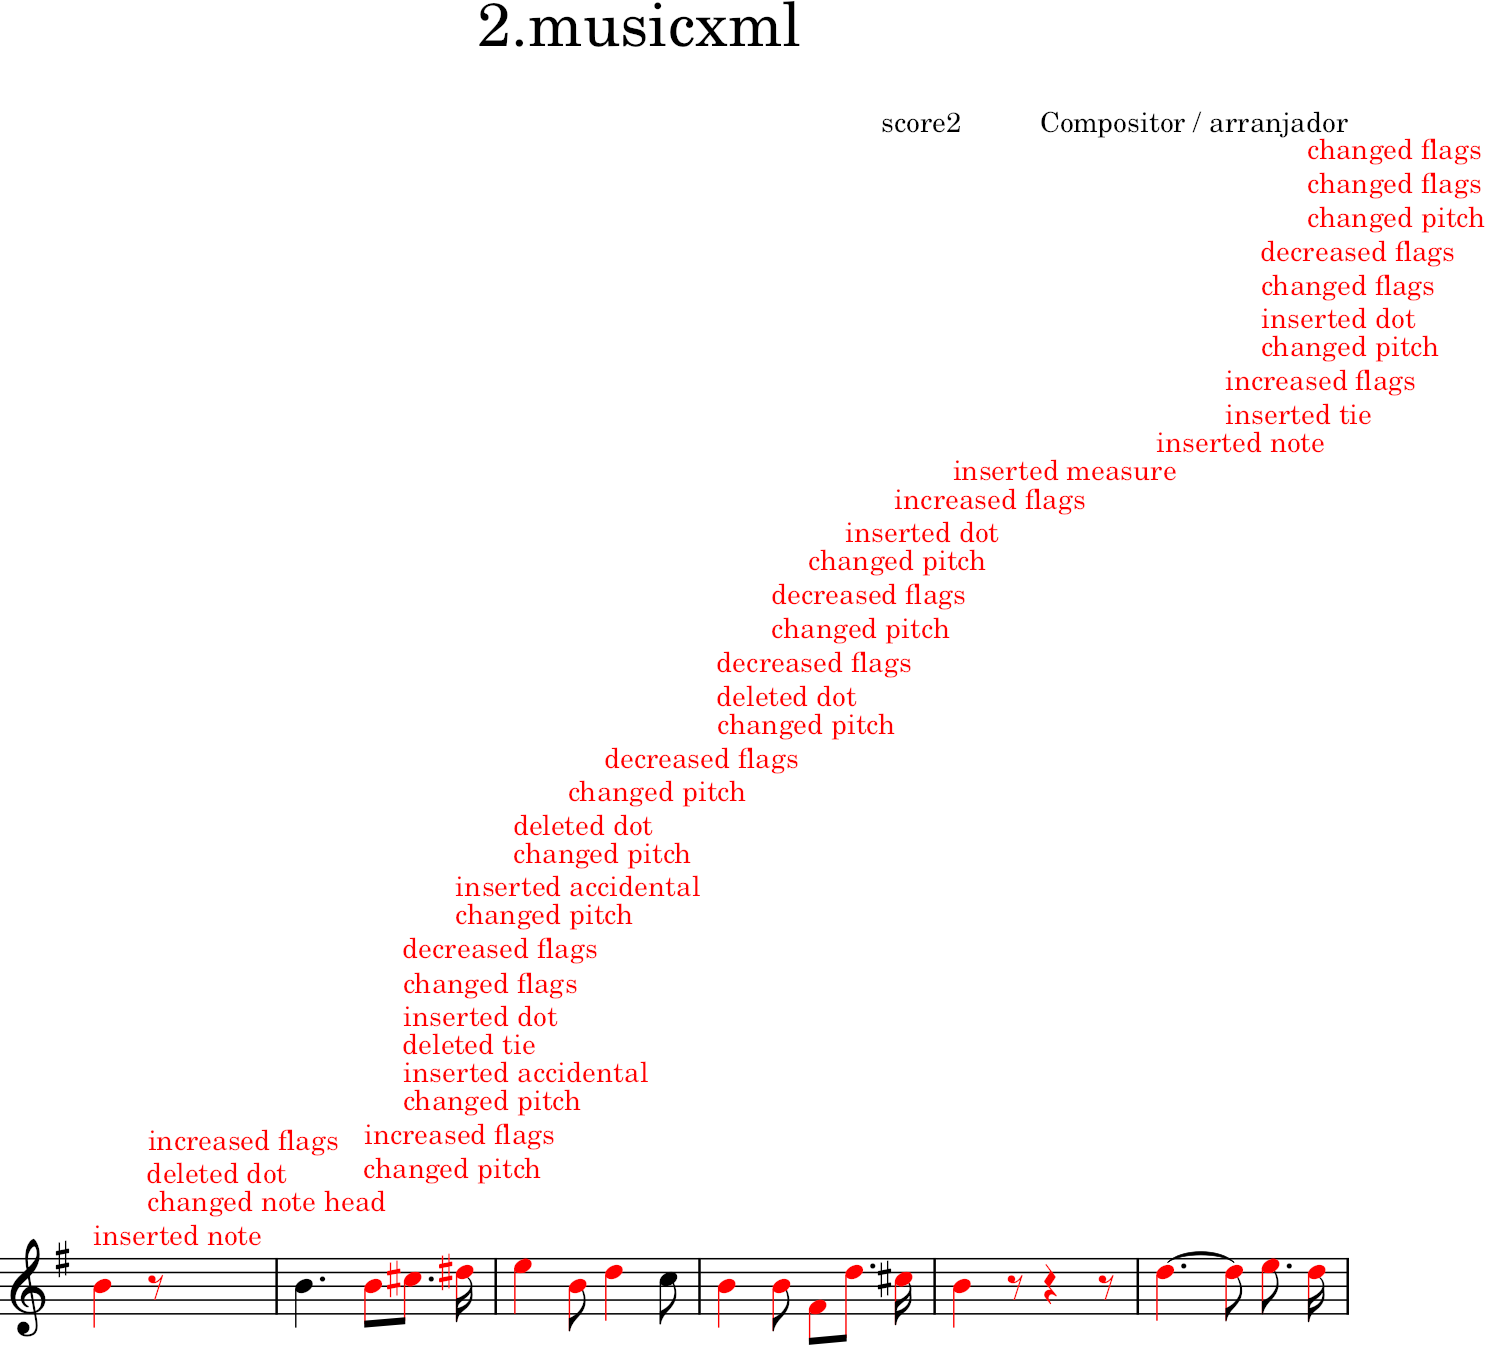

Notes eliminades: 1 (2.00%)
Notes afegides: 2 (4.00%)
Notes substituides: 10 (20.00%)


In [24]:
score2.show()
def count_note_changes(op_list):
    deleted_notes = 0
    added_notes = 0
    substituted_notes = 0
    total_changes = len(op_list)
    
    for op in op_list:
        operation = op[0]  # Nombre de la operación
        
        if operation == "notedel":  # Nota eliminada
            deleted_notes += 1
        elif operation == "noteins":  # Nota añadida
            added_notes += 1
        elif operation == "pitchnameedit":  # Nota sustituida (cambio de tono)
            substituted_notes += 1
    
    # Calcular porcentajes
    deleted_pct = (deleted_notes / total_changes) * 100 if total_changes > 0 else 0
    added_pct = (added_notes / total_changes) * 100 if total_changes > 0 else 0
    substituted_pct = (substituted_notes / total_changes) * 100 if total_changes > 0 else 0
    
    return deleted_notes, added_notes, substituted_notes, deleted_pct, added_pct, substituted_pct

# Llamar a la función y mostrar los resultados
deleted, added, substituted, deleted_pct, added_pct, substituted_pct = count_note_changes(op_list)
print(f"Notes eliminades: {deleted} ({deleted_pct:.2f}%)")
print(f"Notes afegides: {added} ({added_pct:.2f}%)")
print(f"Notes substituides: {substituted} ({substituted_pct:.2f}%)")

In [22]:
sv.show_differences(score1,score2)

Notes eliminades: 1 (2.00%)
Notes afegides: 2 (4.00%)
Notes substituides: 10 (20.00%)
